<a href="https://colab.research.google.com/github/LeeLucky789789/DVR-/blob/main/%E5%88%86%E5%AD%90%E5%8A%9B%E5%AD%A6%E5%B7%A5%E5%85%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 分子力学工具

#介绍


**问题**

* 分子力学是什么意思？

* 什么是力场？

* 我如何告诉软件我的力场是什么？

**目标**
* “分子力学”是什么意思？

* 什么是力场？

* 如何将力场转换为OpenMM可以理解的格式？

## “分子力学”是什么意思？


计算化学是一个领域，它使用在计算机上执行的计算来预测分子的真实世界特性。由于我们无法在计算机中使用“真实”分子，因此我们必须在仿真中使用数学模型来近似其行为。在计算化学领域，根据模型所基于的物理类型，将模拟类型分为两大类。量子化学模拟基于量子力学（如果您已采用量子化学，则为薛定inger方程）。计算化学的另一大类是基于分子力学或经典（牛顿）物理学的。从本质上讲，这与您在物理入门课程中所学的物理学相同，您可以在其中预测空中掷球的路径。

量子力学计算比分子力学计算更准确，更详细。但是，量子计算花费的时间更长（更“昂贵”），并且在可研究的内容方面受到限制。分子力学方法最常用于研究分子的时间依赖性。下图说明了精度和成本之间的这种权衡。左下角显示了使用经典物理学的模拟。它们较便宜，但细节也较少。右上方表示量子力学方法-它们非常准确，但也很昂贵。该研讨会的重点是分子力学模拟。

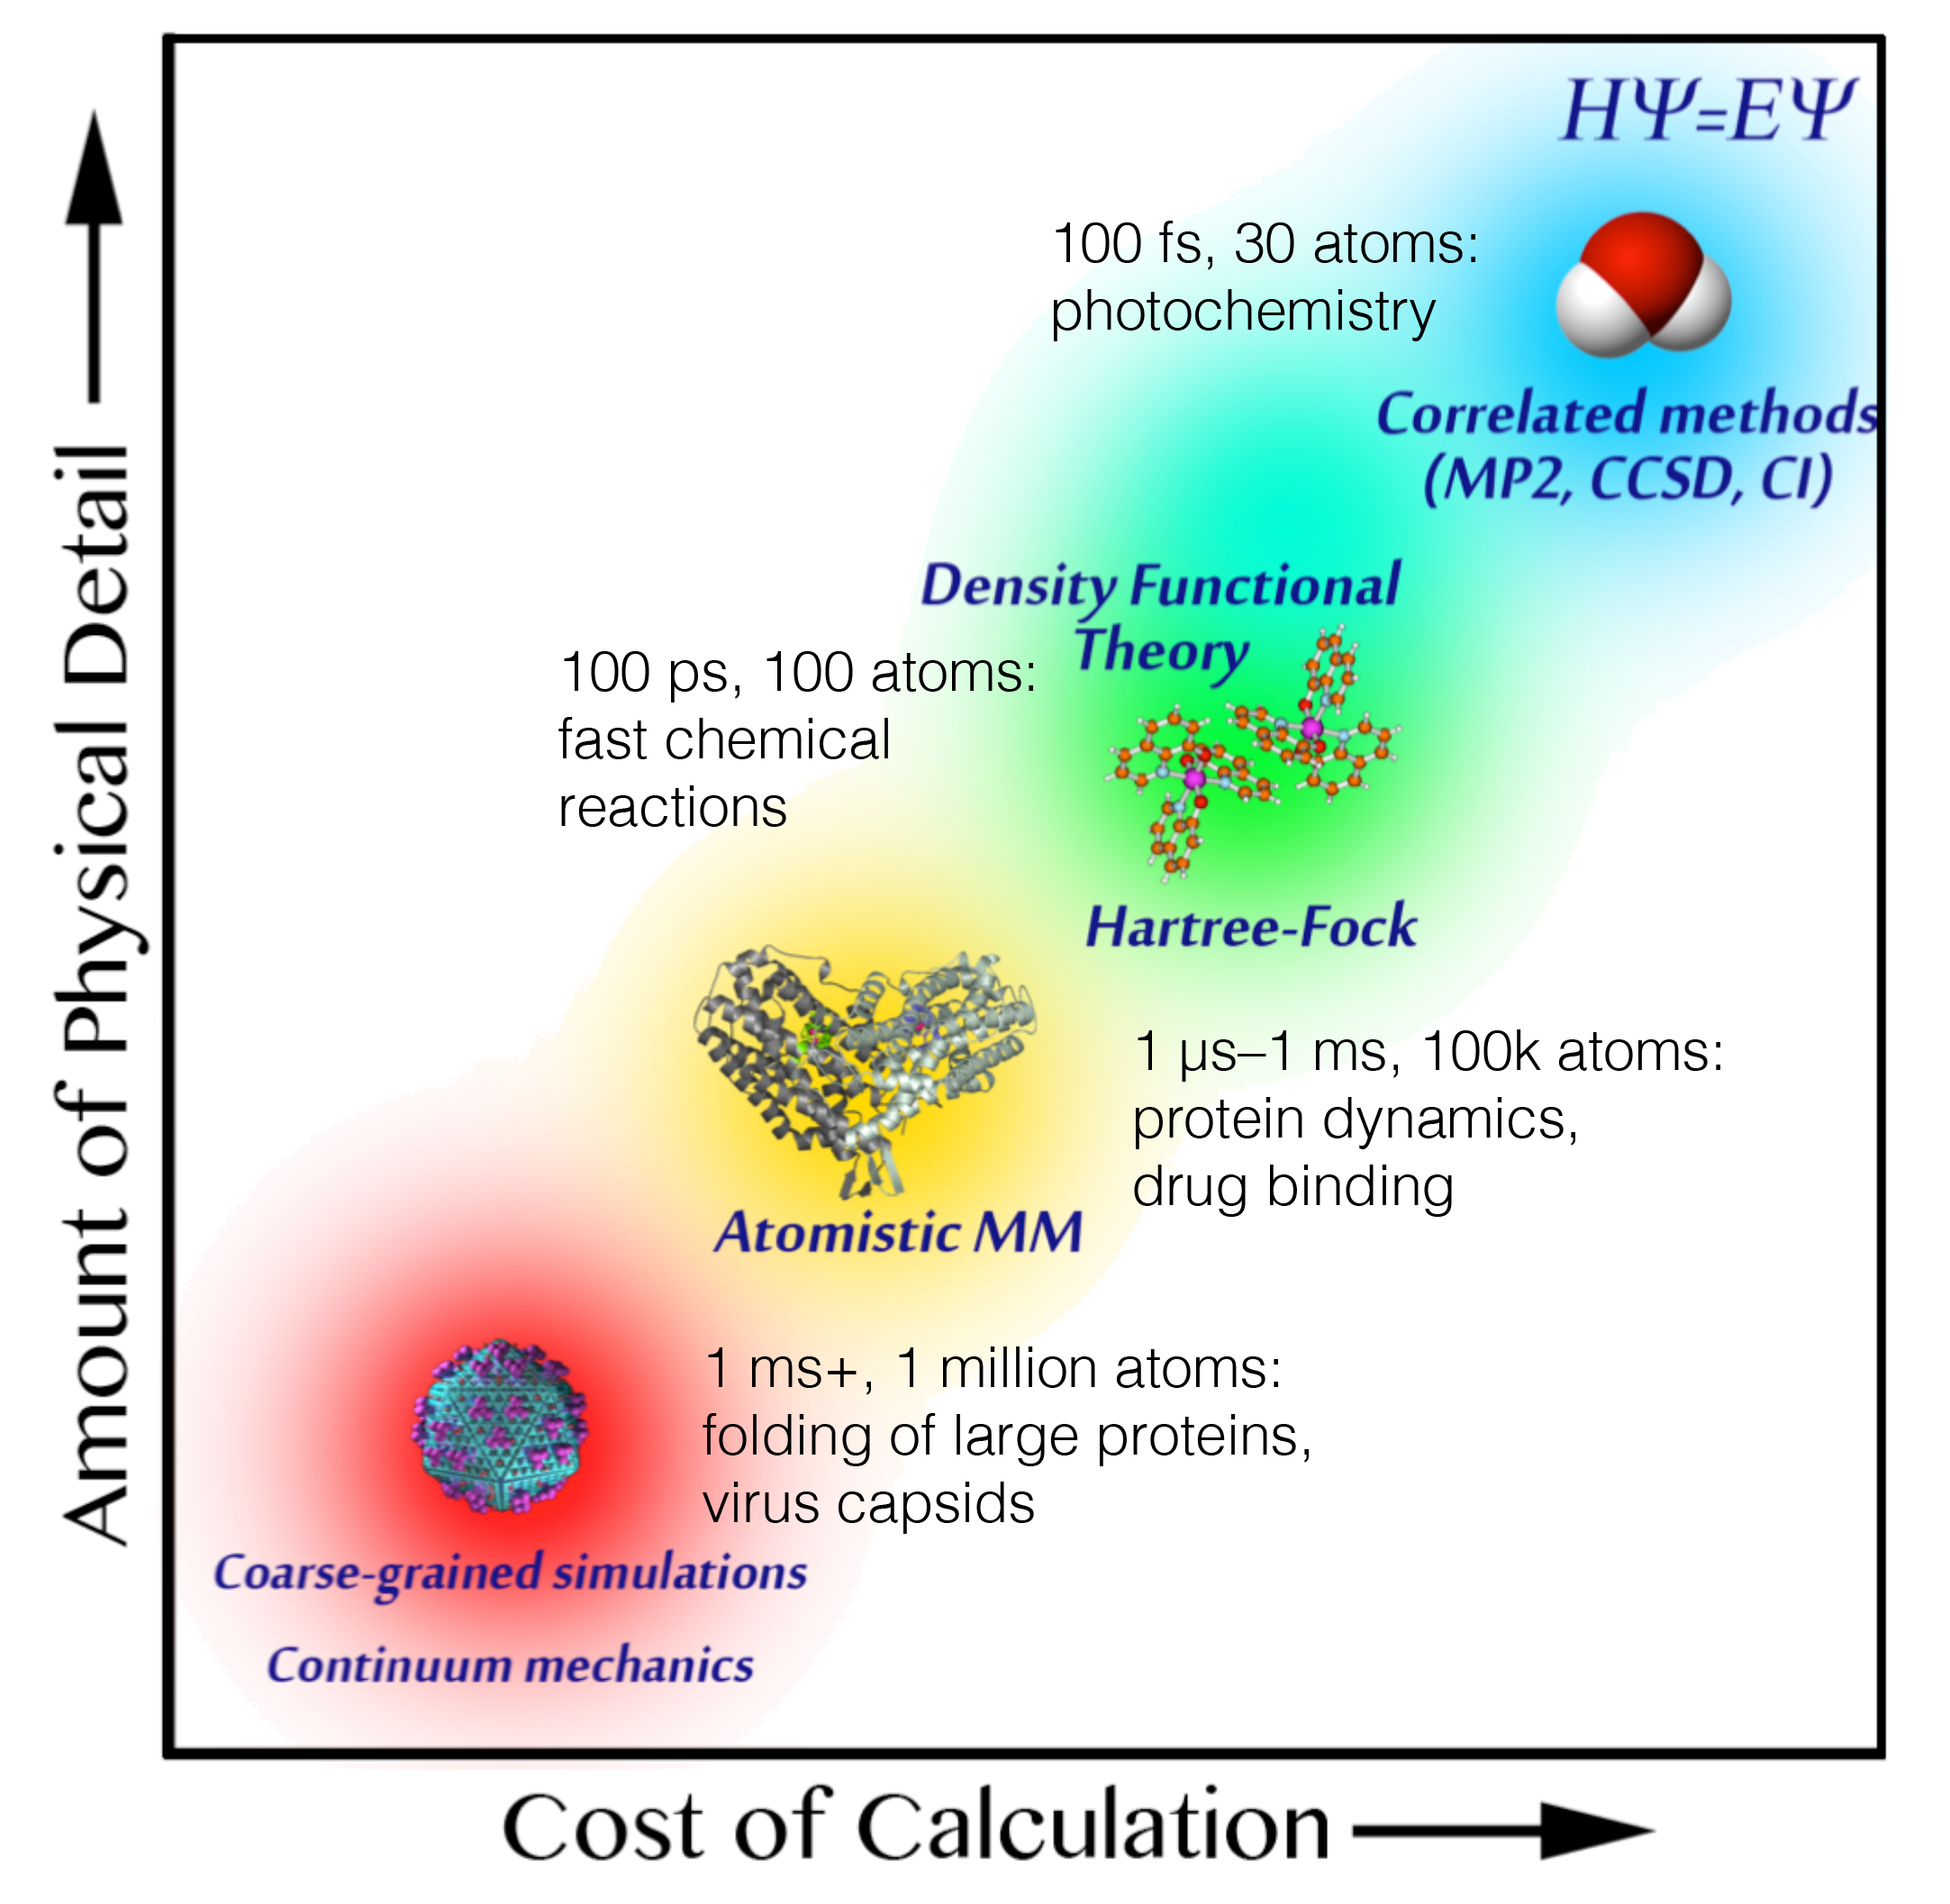

## “力场”

如上所述，所有的计算模拟都依赖于数学模型来描述分子。该模型的完整表达通常称为力场 ，是描述系统势能的函数。该力场描述了与分子运动（例如键拉伸，角弯曲或二面角旋转）相关的能量。如果您是一名化学系学生，您可能在课堂上讨论了许多此类分子运动（谁会忘记谈论有机化学课上丁烷的顺反异构体？）。力场在数学上描述了与这些运动相关的能量。势能通常用字母表示ü，总势能或“力场”是与键拉伸，角弯曲，扭转（顺反异构），静电相互作用和非键范德华相互作用有关的术语的总和。

$$U = U_{bond} + U_{angle} + U_{torsion} + U_{elec} + U_{vdw}$$

下面我们显示这些术语的常用形式。您会从您上过的其他课程中认识很多这些：

$$U_{bond} = \frac{1}{2}k_{l}(l-l_{eq})^2$$

$$U_{angle} = \frac{1}{2}k_{\theta}(\theta - \theta_{eq})^2$$

请注意，通常使用谐波电位来描述键和角度（也用于描述弹簧质量系统。）变量$l$表示两个键合原子之间的距离。 参数$k_{l}$和$l_{eq}$分别表示粘结刚度和平衡粘结长度。 例如，两个双键碳比单键碳具有更短的键长（$l_{eq}$）和更硬的键（较硬的弹簧，或更高的$k_{l}$）。

$$U_{torsion} = \sum_{n=1}^{n_{max}}{U_{n}[1+cos(n\phi-\gamma_{n})]}$$

$$U_{elec} = k_{e}\frac{q_{i}q_{j}}{r_{ij}}$$

$$U_{vdw} = 4\epsilon_{ij}[(\frac{\alpha_{ij}}{r_{ij}})^{12} - (\frac{\alpha_{ij}}{r_{ij}})^{6}]$$

## 创建力场文件

我们将使用软件OpenMM进行分子的模拟。如上所述，我们必须首先设置模型或力场。我们将考虑一个乙烷分子：

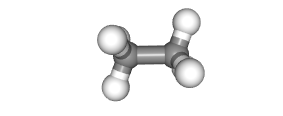





考虑以下参数，我们可以在上述方程式中使用这些参数来描述乙烷。

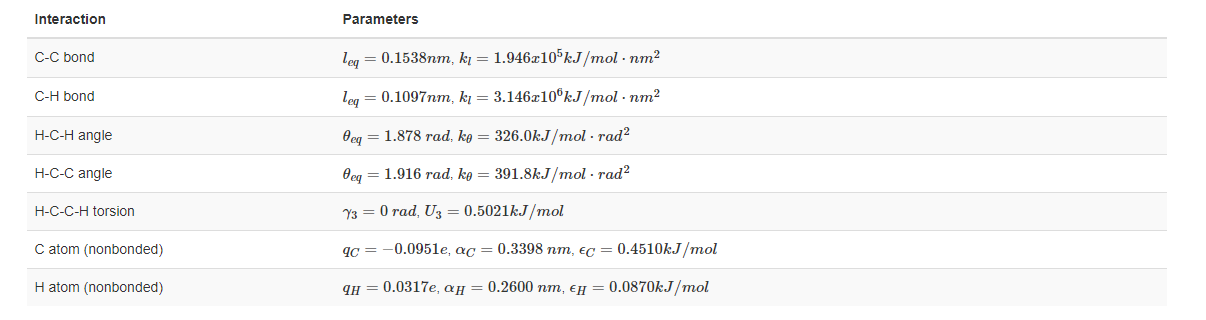

您可以想象如何将这些参数填充到上一节中给出的方程式中，但是我们还必须将它们设置为力场可以理解的格式。OpenMM以一种称为XML的文件格式理解力场。XML文件提供力场参数，还告诉程序原子的连通性（或拓扑）。在使用OpenMM模拟分子之前，我们必须首先创建一个XML文件来告知软件要模拟的分子。在本练习中，我们将手动构建XML文件，但是，您通常不必手动执行此操作（因此，不要让这一部分吓到您）。

考虑乙烷的XML文件：

In [1]:
<ForceField>
 <AtomTypes>
  <Type name="0" class="c3" element="C" mass="12.01078"/>
  <Type name="1" class="hc" element="H" mass="1.007947"/>
 </AtomTypes>
 <Residues>
  <Residue name="ETH">
   <Atom name="C1" type="0"/>
   <Atom name="H11" type="1"/>
   <Atom name="H12" type="1"/>
   <Atom name="H13" type="1"/>
   <Atom name="C2" type="0"/>
   <Atom name="H21" type="1"/>
   <Atom name="H22" type="1"/>
   <Atom name="H23" type="1"/>
   <Bond atomName1="C1" atomName2="H11"/>
   <Bond atomName1="C1" atomName2="H12"/>
   <Bond atomName1="C1" atomName2="H13"/>
   <Bond atomName1="C1" atomName2="C2"/>
   <Bond atomName1="C2" atomName2="H21"/>
   <Bond atomName1="C2" atomName2="H22"/>
   <Bond atomName1="C2" atomName2="H23"/>
  </Residue>
 </Residues>
 <HarmonicBondForce>
  <Bond class1="c3" class2="c3" length="0.15380" k="1945727.36"/>
  <Bond class1="c3" class2="hc" length="0.10970" k="3145687.56"/>
 </HarmonicBondForce>
 <HarmonicAngleForce>
  <Angle class1="c3" class2="c3" class3="hc" angle="1.91637152" k="391.756288"/>
  <Angle class1="hc" class2="c3" class3="hc" angle="1.87762521" k="326.01728"/>
 </HarmonicAngleForce>
 <PeriodicTorsionForce>
  <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>
 </PeriodicTorsionForce>
 <NonbondedForce coulomb14scale="0.833333" lj14scale="0.5">
  <Atom type="0" charge="-0.094100" sigma="0.3397710" epsilon="0.4510352"/>
  <Atom type="1" charge="0.031700" sigma="0.2600177" epsilon="0.0870272"/>
 </NonbondedForce>
</ForceField>

SyntaxError: ignored

让我们看一下文件的每个部分。

首先，通过使用以下语法，我们告诉OpenMM这是一个力场文件：

In [ ]:
<ForceField>

接下来，我们通过设置原子类型来识别分子中的原子。在我们的乙烷分子中，我们有两个碳原子和六个氢原子。两个碳原子是等价的，六个氢原子也都相同。因此，我们有两种类型的原子。我们通过开始AtomTypes部分<AtomTypes>并列出我们的原子类型来告诉OpenMM 。

In [ ]:
 <AtomTypes>
  <Type name="0" class="c3" element="C" mass="12.01078"/>
  <Type name="1" class="hc" element="H" mass="1.007947"/>
 </AtomTypes>

接下来，我们定义系统的连接性或拓扑。我们可能在模拟中模拟许多分子，每个分子都称为“残基”。我们将告诉OpenMM每个原子属于哪些原子，以及每个原子与哪些其他原子键合。因为我们仅描述一个分子，所以我们只有一个残基。

In [ ]:
<Residues>
  <Residue name="ETH">
   <Atom name="C1" type="0"/>
   <Atom name="H11" type="1"/>
   <Atom name="H12" type="1"/>
   <Atom name="H13" type="1"/>
   <Atom name="C2" type="0"/>
   <Atom name="H21" type="1"/>
   <Atom name="H22" type="1"/>
   <Atom name="H23" type="1"/>
   <Bond atomName1="C1" atomName2="H11"/>
   <Bond atomName1="C1" atomName2="H12"/>
   <Bond atomName1="C1" atomName2="H13"/>
   <Bond atomName1="C1" atomName2="C2"/>
   <Bond atomName1="C2" atomName2="H21"/>
   <Bond atomName1="C2" atomName2="H22"/>
   <Bond atomName1="C2" atomName2="H23"/>
  </Residue>
 </Residues>

最后，我们告诉OpenMM我们力场方程的参数。

In [ ]:
<HarmonicBondForce>
  <Bond class1="c3" class2="c3" length="0.15380" k="1945727.36"/>
  <Bond class1="c3" class2="hc" length="0.10970" k="3145687.56"/>
 </HarmonicBondForce>
 <HarmonicAngleForce>
  <Angle class1="c3" class2="c3" class3="hc" angle="1.91637152" k="391.756288"/>
  <Angle class1="hc" class2="c3" class3="hc" angle="1.87762521" k="326.01728"/>
 </HarmonicAngleForce>
 <PeriodicTorsionForce>
  <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>
 </PeriodicTorsionForce>
 <NonbondedForce coulomb14scale="0.833333" lj14scale="0.5">
  <Atom type="0" charge="-0.094100" sigma="0.3397710" epsilon="0.4510352"/>
  <Atom type="1" charge="0.031700" sigma="0.2600177" epsilon="0.0870272"/>
 </NonbondedForce>
</ForceField>

最后一行告诉OpenMM我们已经完成了有关ForceField的介绍。我们已经为OpenMM准备了文件，现在可以模拟我们的分子了。